<a href="https://colab.research.google.com/github/cdevrywhr/forecasting-basic/blob/main/IG_Reach_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

**IMPORT DAN MEILHAT DATA**

In [2]:
df = pd.read_csv("Instagram.csv", encoding='latin1')
print(df.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0       3920.0     2586.0         1028.0         619.0        56.0   98.0   
1       5394.0     2727.0         1838.0        1174.0        78.0  194.0   
2       4021.0     2085.0         1188.0           0.0       533.0   41.0   
3       4528.0     2700.0          621.0         932.0        73.0  172.0   
4       2518.0     1704.0          255.0         279.0        37.0   96.0   

   Comments  Shares  Likes  Profile Visits  Follows  \
0       9.0     5.0  162.0            35.0      2.0   
1       7.0    14.0  224.0            48.0     10.0   
2      11.0     1.0  131.0            62.0     12.0   
3      10.0     7.0  213.0            23.0      8.0   
4       5.0     4.0  123.0             8.0      0.0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [24]:
#cek ukuran data 
df.shape

(99, 13)

**DATA PREPARATION**

In [3]:
#data cleaning
#cek data null
df.isnull().sum()

Impressions       1
From Home         1
From Hashtags     1
From Explore      1
From Other        1
Saves             1
Comments          1
Shares            1
Likes             1
Profile Visits    1
Follows           1
Caption           1
Hashtags          1
dtype: int64

In [4]:
#hapus data null
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     99 non-null     float64
 1   From Home       99 non-null     float64
 2   From Hashtags   99 non-null     float64
 3   From Explore    99 non-null     float64
 4   From Other      99 non-null     float64
 5   Saves           99 non-null     float64
 6   Comments        99 non-null     float64
 7   Shares          99 non-null     float64
 8   Likes           99 non-null     float64
 9   Profile Visits  99 non-null     float64
 10  Follows         99 non-null     float64
 11  Caption         99 non-null     object 
 12  Hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.8+ KB


**EXPLORATORY DATA ANALYSIS**

Analisis Instagram Reach

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


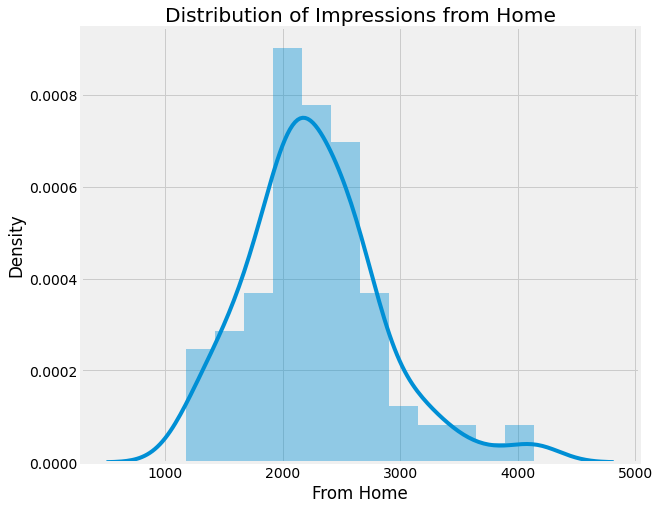

In [6]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions from Home")
sns.distplot(df['From Home'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


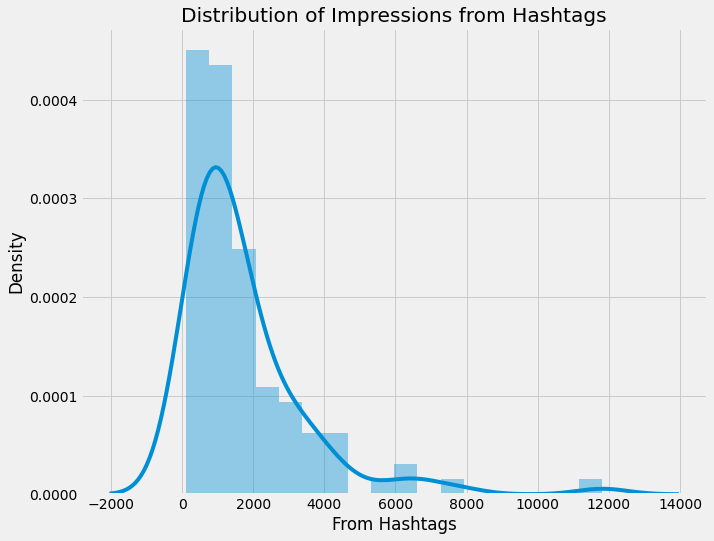

In [7]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions from Hashtags")
sns.distplot(df['From Hashtags'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


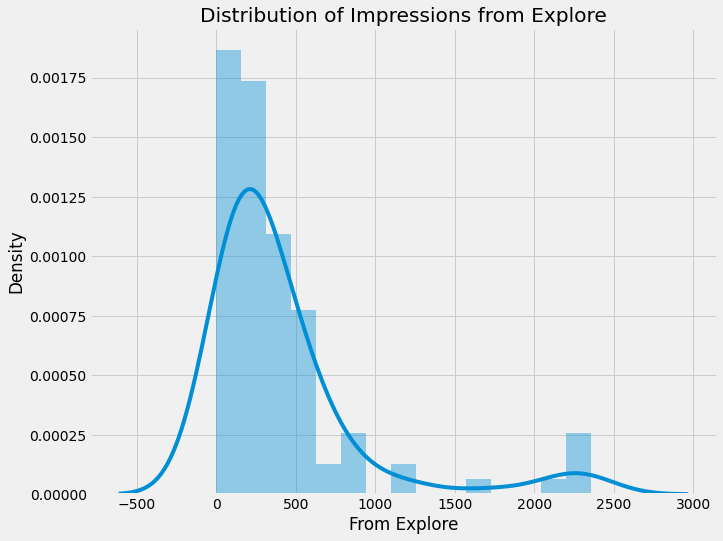

In [8]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions from Explore")
sns.distplot(df['From Explore'])
plt.show()

In [9]:
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
other = df["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home,hashtags,explore,other]

fig = px.pie(df, values=values, names=labels, title="Impressions on Instagram Posts From Various Sources",hole=0.5)

fig.show()

Analisis Konten

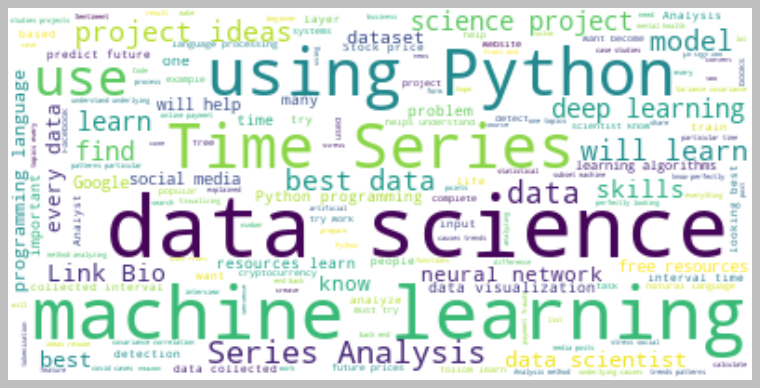

In [10]:
#melihat term yang sering dipakai pada caption
text = " ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


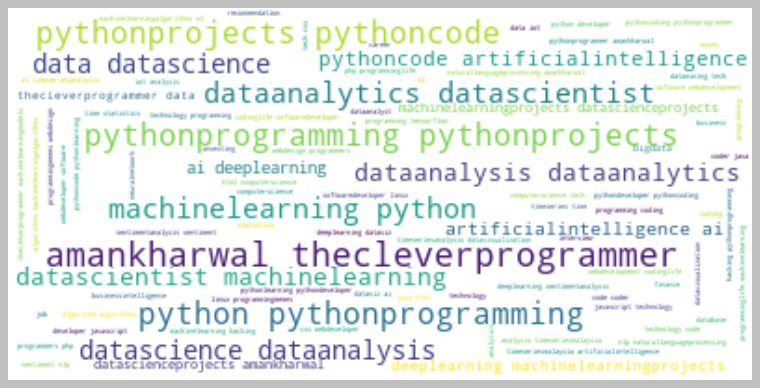

In [11]:
#melihat term yang sering dipakai pada hashtags
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Analisis Relationships

In [12]:
figure = px.scatter(data_frame=df, x='Impressions',y='Likes', size='Likes', trendline='ols',
                    title='Relationship BeTween Likes and Impressions')
figure.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [13]:
figure = px.scatter(data_frame=df, x='Impressions',y='Comments', size='Comments', trendline='ols',
                    title='Relationship Between Comments and Impressions')
figure.show()

In [14]:
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

In [15]:
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

Korelasi

In [16]:
#correlation
correlation = df.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64


In [23]:
#matrix korelasi
correlation.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
Impressions,1.00,0.60,0.89,0.50,0.43,0.63,0.25,0.48,0.90,0.77,0.80
From Home,0.60,1.00,0.25,0.63,0.25,0.75,0.40,0.62,0.75,0.32,0.48
From Hashtags,0.89,0.25,1.00,0.12,0.26,0.32,0.19,0.25,0.72,0.79,0.68
From Explore,0.50,0.63,0.12,1.00,0.30,0.75,0.03,0.53,0.54,0.14,0.43
From Other,0.43,0.25,0.26,0.30,1.00,0.25,-0.08,0.09,0.34,0.44,0.59
Saves,0.63,0.75,0.32,0.75,0.25,1.00,0.14,0.74,0.76,0.18,0.40
Comments,0.25,0.40,0.19,0.03,-0.08,0.14,1.00,0.18,0.31,0.21,0.10
Shares,0.48,0.62,0.25,0.53,0.09,0.74,0.18,1.00,0.58,0.17,0.30
Likes,0.90,0.75,0.72,0.54,0.34,0.76,0.31,0.58,1.00,0.59,0.64
Profile Visits,0.77,0.32,0.79,0.14,0.44,0.18,0.21,0.17,0.59,1.00,0.87


Analisis Rate Kunjungan 

In [18]:
conversion_rate = (df["Follows"].sum() / df["Profile Visits"].sum()) * 100
print(conversion_rate)

31.17770767613039


In [19]:
figure = px.scatter(data_frame = df, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

**MODELING**

Prediksi Reach dari Instagram post menggunakan PassiveAggressiveRegressor

In [20]:
#membagi data menjadi 80% train 20% test 
x = np.array(df[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(df["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [21]:
#modeling ML
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9447626068063113

In [22]:
#Prediksi
# Features = [['Impressions','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([9792.28775509])

**KESIMPULAN**

Kesimpulan pada pemodelan terlihat bahwa didapatkan nilai akurasi sebesar 94%. Dengan percobaan prediksi menggunakan komposisi nilai seperti diatas didapat bahwa dengan nilai pervariabel tersebut didapat nilai reach yang bisa didapat sebesar 9792.  